# Exploratory Data Analysis of Netflix Content

This notebook aims to perform an exploratory analysis of the Netflix dataset to uncover trends, distributions, and insights regarding the content available on the platform. The dataset contains information about movies and TV shows, including details such as release year, genre, duration, country, and ratings.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/idil/Desktop/static_csv.xls')

# Basic Data Info

In [3]:
df.shape

(8807, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     8807 non-null   int64  
 1   show_id        8807 non-null   object 
 2   type           8807 non-null   object 
 3   title          8807 non-null   object 
 4   director       6925 non-null   object 
 5   cast           8675 non-null   object 
 6   country        8089 non-null   object 
 7   date_added     8797 non-null   object 
 8   release_year   8807 non-null   int64  
 9   rating         8803 non-null   object 
 10  release_month  8797 non-null   float64
 11  duration       8804 non-null   object 
 12  audience       8803 non-null   object 
 13  listed_in      8807 non-null   object 
 14  description    8807 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.0+ MB


In [5]:
# Finding the number of nulls in the data
df.isnull().sum()

Unnamed: 0          0
show_id             0
type                0
title               0
director         1882
cast              132
country           718
date_added         10
release_year        0
rating              4
release_month      10
duration            3
audience            4
listed_in           0
description         0
dtype: int64

In [6]:
df.head(10)

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,release_month,duration,audience,listed_in,description
0,0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...",United States,2021-09-25,2020,PG-13,9.0,90 min,Teens,Documentaries,"As her father nears the end of his life, filmm..."
1,1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,9.0,2 Seasons,Adults,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,2021-09-24,2021,TV-MA,9.0,1 Season,Adults,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,9.0,1 Season,Adults,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,4,s5,TV Show,Kota Factory,Raghav Subbu,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,9.0,2 Seasons,Adults,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,9.0,1 Season,Adults,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,2021-09-24,2021,PG,9.0,91 min,Kids,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,9.0,125 min,Adults,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9.0,9 Seasons,Teens,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,9.0,104 min,Teens,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [7]:
df.tail()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,release_month,duration,audience,listed_in,description
8802,8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,11.0,158 min,Adults,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,7.0,2 Seasons,Kids,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,11.0,88 min,Adults,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,1.0,88 min,Kids,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,3.0,111 min,Teens,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [8]:
# Finding the number of nulls in the data
df.isnull().sum()

Unnamed: 0          0
show_id             0
type                0
title               0
director         1882
cast              132
country           718
date_added         10
release_year        0
rating              4
release_month      10
duration            3
audience            4
listed_in           0
description         0
dtype: int64

# Data Analysis

In [9]:
netflix_df= df.copy()

In [10]:
netflix_df["type"].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

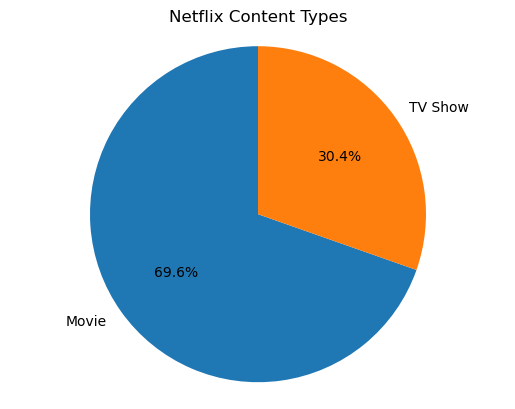

In [11]:
# Plotting a pie chart
type_counts = netflix_df["type"].value_counts()

type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Netflix Content Types')
plt.ylabel('')  # No need for a y-axis label in a pie chart
plt.show()

In [12]:
#Top countries producing content on Netflix
top_10_countries = netflix_df['country'].value_counts().head(10)
top_10_countries_df = top_10_countries.reset_index(name = 'total')
top_10_countries_df

,country,total
0,United States,2862
1,India,993
2,United Kingdom,421
3,Japan,248
4,South Korea,214
5,Canada,181
6,Spain,146
7,France,129
8,Mexico,110
9,Egypt,106


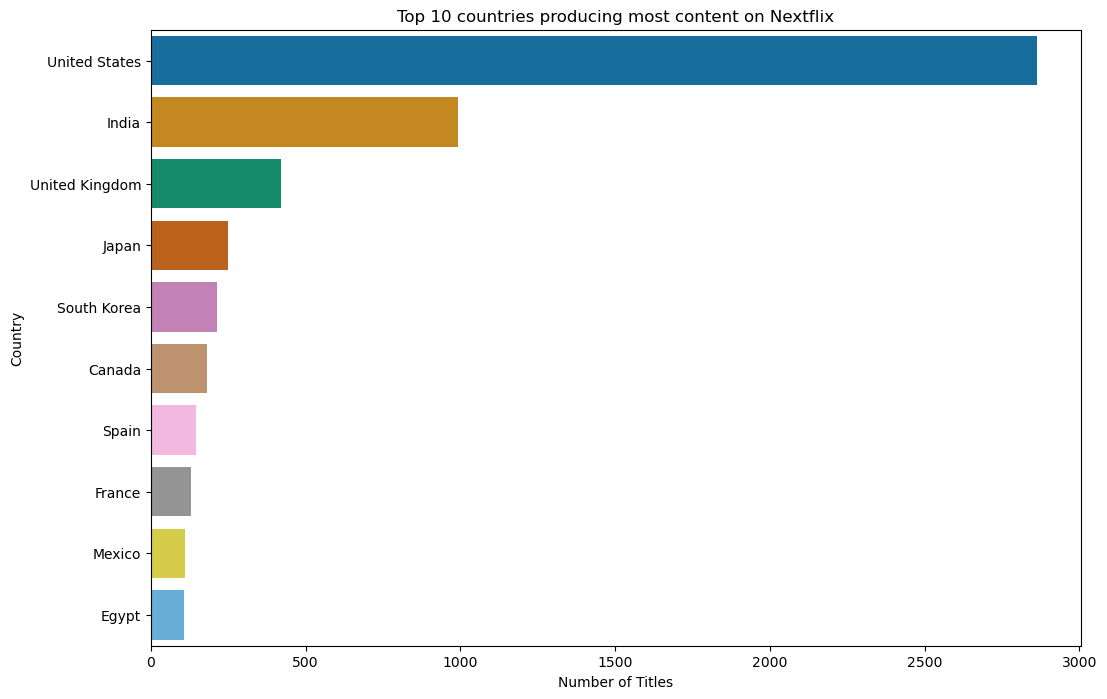

In [13]:
plt.figure(figsize = (12,8))
sns.barplot (x = "total", y = "country", data = top_10_countries_df, palette = 'colorblind' )
plt.title ('Top 10 countries producing most content on Nextflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

In [14]:
# Tv shows are mostly produced by which country

In [15]:
tv= netflix_df[netflix_df["type"]=="TV Show"]
print(tv.groupby("type")["country"].value_counts().head(10))

type     country       
TV Show  United States     800
         United Kingdom    215
         Japan             172
         South Korea       172
         India              89
         Taiwan             71
         Canada             59
         France             54
         Australia          51
         Spain              49
Name: count, dtype: int64


In [16]:
movie= netflix_df[netflix_df["type"]=="Movie"]
print(movie.groupby("type")["country"].value_counts().head(10))

type   country       
Movie  United States     2062
       India              904
       United Kingdom     206
       Canada             122
       Spain               97
       Egypt               92
       Nigeria             86
       Indonesia           77
       Turkey              76
       Japan               76
Name: count, dtype: int64


In [17]:
#In which month mostly movies or Tv shows are Aired 

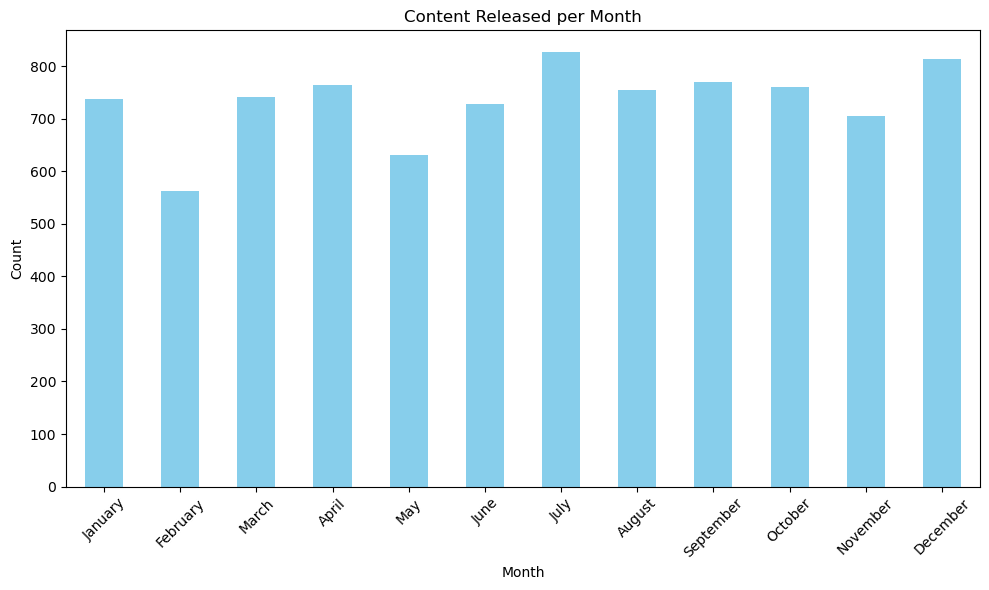

In [18]:
import calendar

# Drop rows with NaN values in 'release_month' column
netflix_df = netflix_df.dropna(subset=['release_month'])

# Convert float values in 'release_month' to month names
netflix_df['release_month'] = netflix_df['release_month'].astype(int).apply(lambda x: calendar.month_name[x])

# Count occurrences of content released in each month
month_counts = netflix_df['release_month'].value_counts()

# Create a list of months in chronological order
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Sort the months based on the predefined order
month_counts = month_counts.reindex(months_order)

# Create a bar plot for content released per month
plt.figure(figsize=(10, 6))
month_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Content Released per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [19]:
#Popular genres on Netflix
genres = netflix_df['listed_in'].explode().value_counts().head(10)
genres 

listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: count, dtype: int64

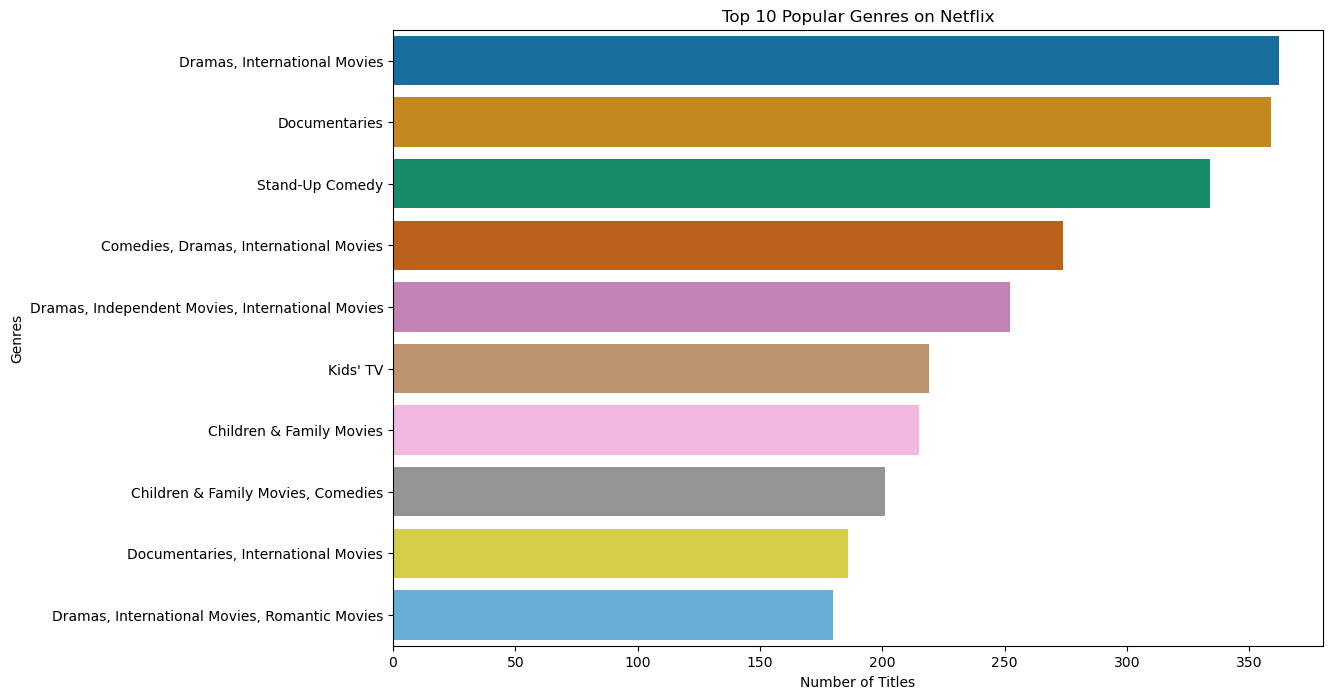

In [20]:
plt.figure(figsize=(12,8))
sns.barplot(x=genres.values, y=genres.index, palette = 'colorblind')
plt.title("Top 10 Popular Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genres")
plt.show()

In [21]:
netflix_df["rating"].describe()

count      8793
unique       14
top       TV-MA
freq       3208
Name: rating, dtype: object

In [22]:
# Mostly movies and Tv shows has mostly what type of rating


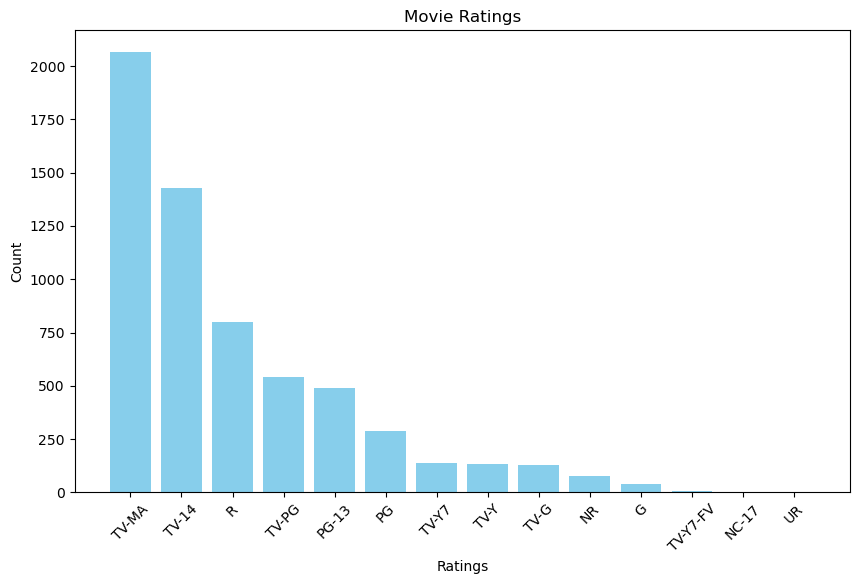

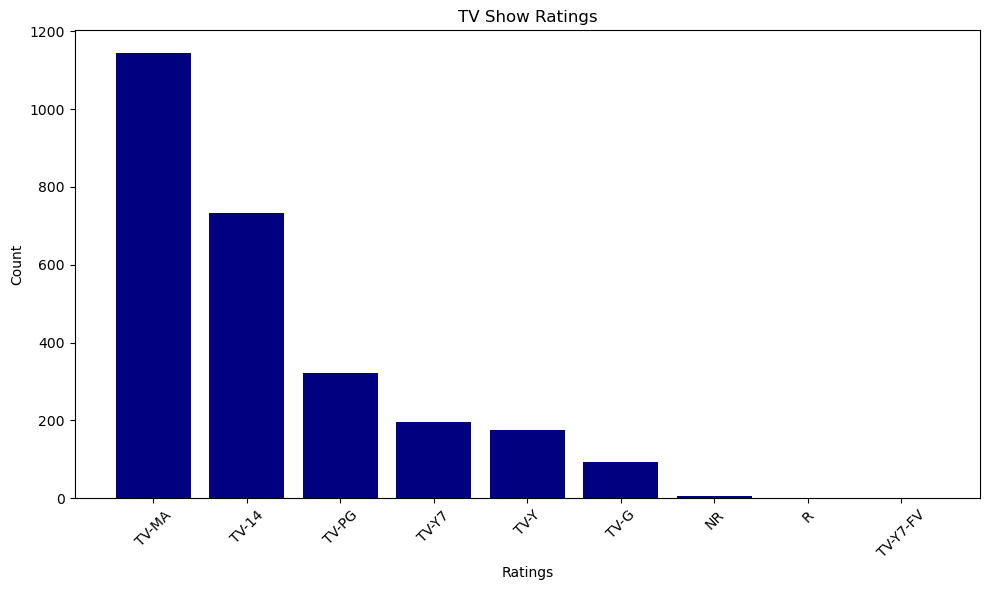

In [23]:
movie_ratings_count = movie["rating"].value_counts()


# Creating a bar plot for movie ratings
plt.figure(figsize=(10, 6))
plt.bar(movie_ratings_count.index, movie_ratings_count.values, color='skyblue')
plt.title('Movie Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

tv_ratings_count = tv["rating"].value_counts()

# Creating a bar plot for TV show ratings

plt.figure(figsize=(10, 6))
plt.bar(tv_ratings_count.index, tv_ratings_count.values, color='navy')
plt.title('TV Show Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# statistical analysis

In [29]:
netflix_df.describe()

,Unnamed: 0,release_year,duration
count,8797.000000,8797.000000,8794.000000
mean,4399.976583,2014.194043,69.920173
std,2542.278989,8.770881,50.797005
min,0.000000,1942.000000,1.000000
25%,2199.000000,2013.000000,2.000000
50%,4398.000000,2017.000000,88.000000
75%,6599.000000,2019.000000,106.000000
max,8806.000000,2021.000000,312.000000


In [30]:
# Grouping by a categorical variable ('type') and calculating the mean for 'release_year'
average_release_year_by_type = netflix_df.groupby('type')['release_year'].mean()
average_release_year_by_type


type
Movie      2013.121514
TV Show    2016.660540
Name: release_year, dtype: float64

In [31]:
# Grouping by 'rating' and finding the average 'release_year'
average_release_year_by_rating = netflix_df.groupby('rating')['release_year'].mean()
average_release_year_by_rating


rating
G           1997.804878
NC-17       2015.000000
NR          2010.860759
PG          2008.428571
PG-13       2009.314286
R           2010.471840
TV-14       2013.707000
TV-G        2015.745455
TV-MA       2016.660536
TV-PG       2013.536585
TV-Y        2017.183007
TV-Y7       2015.510511
TV-Y7-FV    2014.833333
UR          1999.333333
Name: release_year, dtype: float64

In [32]:
#Grouping by 'country' and calculating the average 'release_year'
average_release_year_by_country = netflix_df.groupby('country')['release_year'].mean()
average_release_year_by_country


country
, France, Algeria                                      2014.000000
, South Korea                                          2021.000000
Argentina                                              2016.035088
Argentina, Brazil, France, Poland, Germany, Denmark    2017.000000
Argentina, Chile                                       2011.500000
                                                          ...     
Venezuela                                              2017.000000
Venezuela, Colombia                                    2007.000000
Vietnam                                                2017.714286
West Germany                                           1977.000000
Zimbabwe                                               2017.000000
Name: release_year, Length: 750, dtype: float64

Conclusion for the statistic analysis  

Content Type and Release Year:
Movies tend to have an average release year around 2013, while TV shows are more recent, averaging around 2017.
Release Year and Content Rating:

Different content ratings show varying average release years. For example, 'G' rated content dates back to the late '90s, while 'TV-Y' shows are from around 2017.
Release Year Across Countries:

Release years vary widely across countries, suggesting a mix of older and newer content. This reflects diverse regional content offerings and Netflix's global content strategy.

These insights highlight Netflix's efforts to provide a varied content library across different timelines, ratings, and regions, catering to diverse audience preferences.



# Data Visualization for presentions 

/var/folders/_f/5qy4_g9x2t76_lmg_c4ky0740000gn/T/ipykernel_2888/2702849382.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


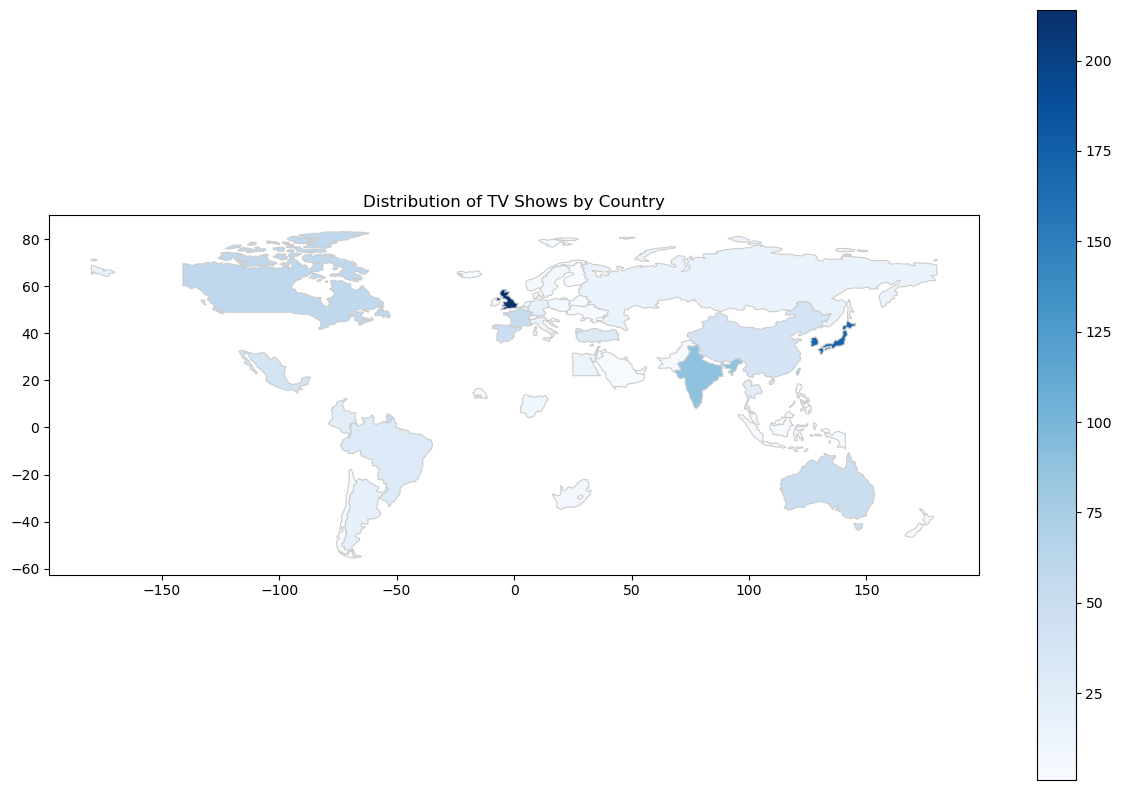

In [34]:
# Count the number of TV shows by country
tv_shows_by_country = netflix_df[netflix_df['type'] == 'TV Show'].groupby('country').size().reset_index(name='TV Show')

# Load world map data (built-in dataset in Geopandas)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge TV show data with the map data
merged = world.merge(tv_shows_by_country, how='left', left_on='name', right_on='country')

# Plotting TV show distribution
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='TV Show', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Distribution of TV Shows by Country')
plt.show()


/var/folders/_f/5qy4_g9x2t76_lmg_c4ky0740000gn/T/ipykernel_2888/179110890.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


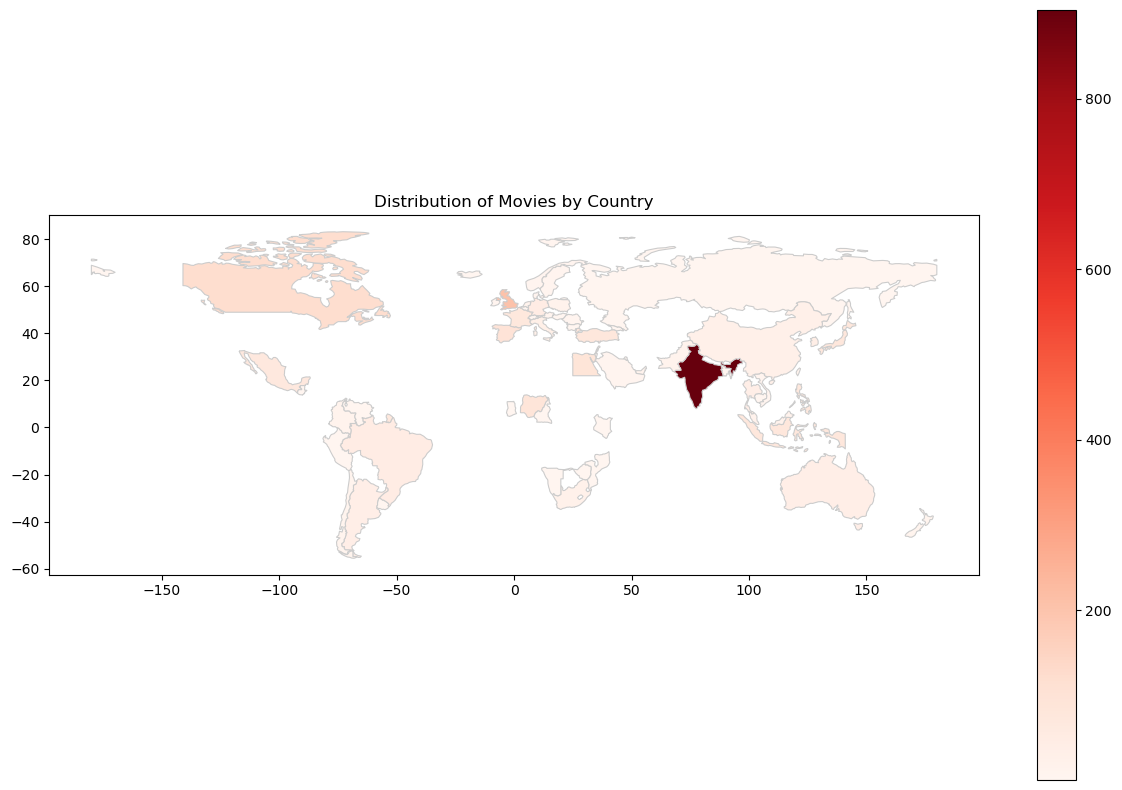

In [35]:
# Count the number of movies by country
movies_by_country = netflix_df[netflix_df['type'] == 'Movie'].groupby('country').size().reset_index(name='Movie')

# Load world map data (built-in dataset in Geopandas)
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge movie data with the map data
merged = world.merge(movies_by_country, how='left', left_on='name', right_on='country')

# Plotting movie distribution
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged.plot(column='Movie', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Distribution of Movies by Country')
plt.show()


In [36]:
# Convert to string type
netflix_df['duration'] = netflix_df['duration'].astype(str)   # Convert to string type
# Extract numeric values from 'duration' column
netflix_df['duration'] = netflix_df['duration'].str.extract('(\d+)').astype(float)

# Calculate the average duration for each group
avg_duration = netflix_df.groupby(['country', 'type'])['duration'].mean().reset_index()

# Filter for specific types
avg_duration_movies = avg_duration[avg_duration['type'] == 'Movie']
avg_duration_movies

,country,type,duration
0,", France, Algeria",Movie,103.000000
2,Argentina,Movie,85.789474
4,"Argentina, Brazil, France, Poland, Germany, De...",Movie,96.000000
5,"Argentina, Chile",Movie,95.000000
6,"Argentina, Chile, Peru",Movie,100.000000
...,...,...,...
844,Venezuela,Movie,119.000000
845,"Venezuela, Colombia",Movie,82.000000
846,Vietnam,Movie,106.285714
847,West Germany,Movie,150.000000


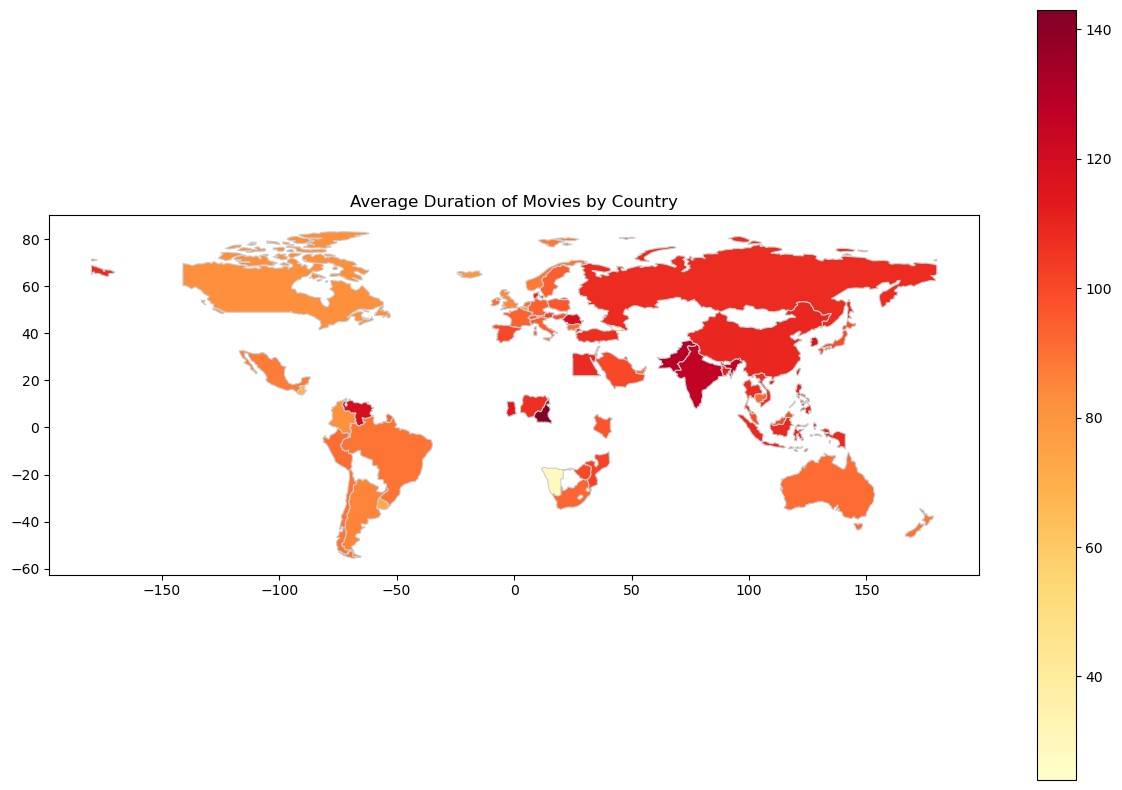

In [43]:
# Calculate the average duration for movies by country
avg_duration_movies = netflix_df[netflix_df['type'] == 'Movie'].groupby('country')['duration'].mean().reset_index()

# Merging movie data with the map data
merged_movies = world.merge(avg_duration_movies, how='left', left_on='name', right_on='country')

# Plotting movie duration distribution
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_movies.plot(column='duration', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Average Duration of Movies by Country')
plt.show()


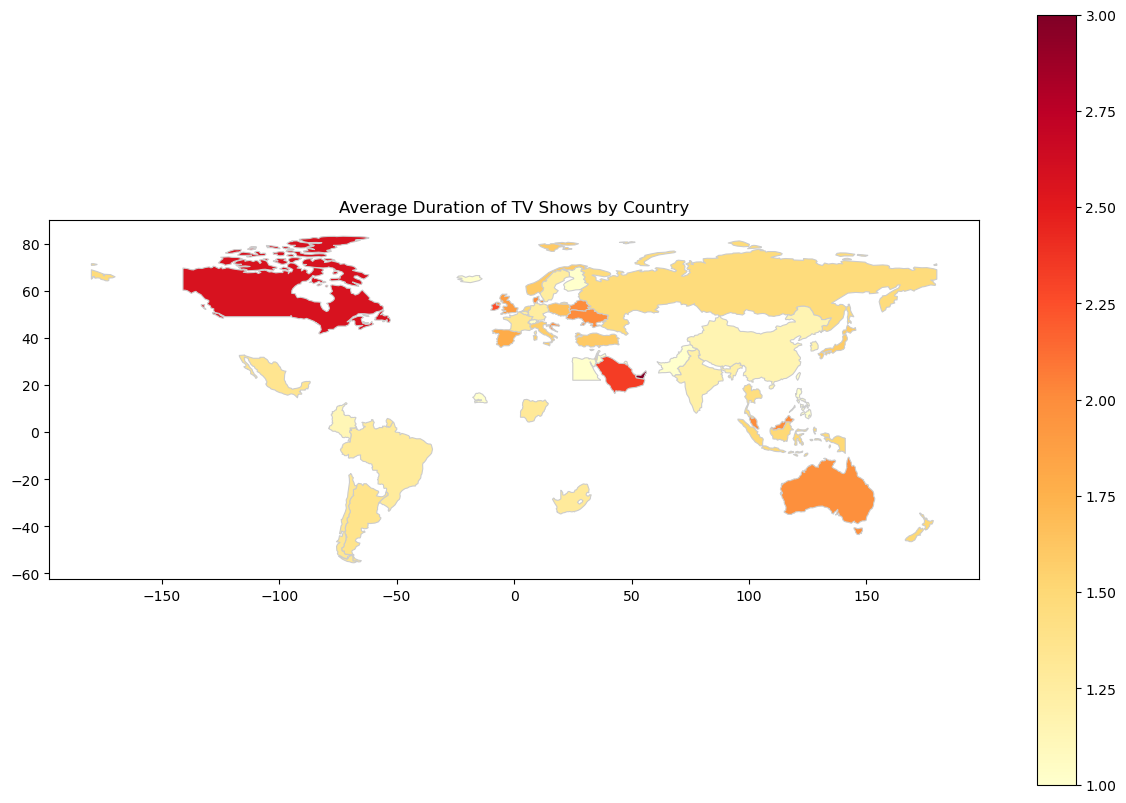

In [42]:
# Calculate the average duration for TV shows by country
avg_duration_tv_shows = netflix_df[netflix_df['type'] == 'TV Show'].groupby('country')['duration'].mean().reset_index()


# Merging TV show data with the map data
merged_tv_shows = world.merge(avg_duration_tv_shows, how='left', left_on='name', right_on='country')

# Plotting TV show duration distribution
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_tv_shows.plot(column='duration', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
plt.title('Average Duration of TV Shows by Country')
plt.show()

/var/folders/_f/5qy4_g9x2t76_lmg_c4ky0740000gn/T/ipykernel_2888/1172127573.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


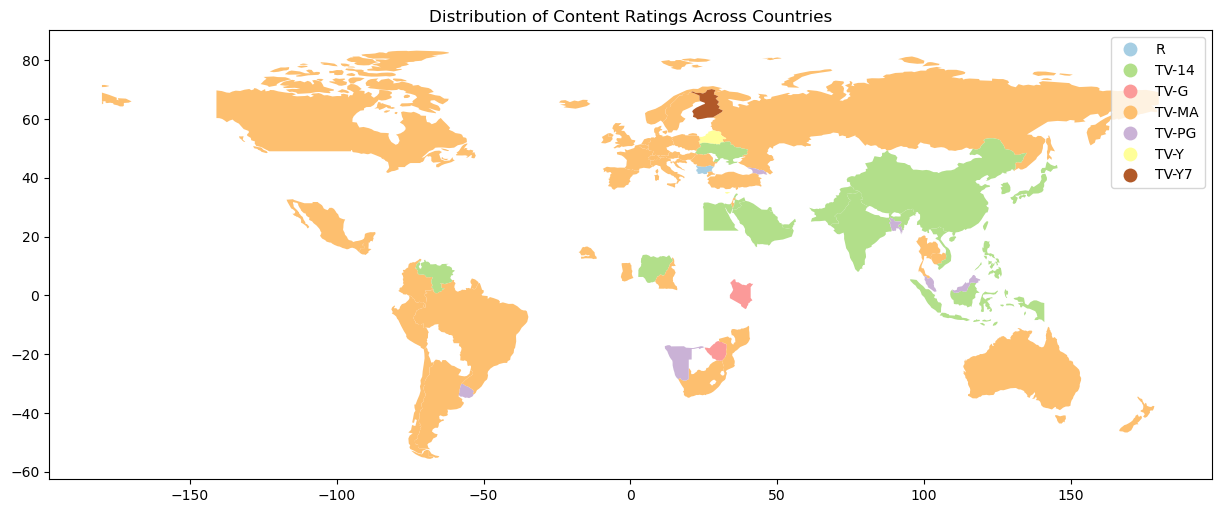

In [39]:
# Grouping by country and finding the predominant content rating
predominant_rating = netflix_df.groupby('country')['rating'].agg(lambda x: x.value_counts().index[0]).reset_index()

# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merging predominant rating data with the map data
merged_ratings = world.merge(predominant_rating, how='left', left_on='name', right_on='country')

# Create a dictionary to map ratings to colors
rating_colors = {
    'G': 'green',
    'PG': 'yellow',
    'PG-13': 'orange',
    'R': 'red',
}

# Plotting the distribution of content ratings across countries
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_ratings.plot(column='rating', cmap='Paired', legend=True, ax=ax)
plt.title('Distribution of Content Ratings Across Countries')


plt.show()

In [44]:
# Calculate mean ratings
mean_rating = netflix_df['rating'].value_counts(normalize=True)

# Calculate median duration
median_duration = netflix_df['duration'].median()

print("Mean Ratings:")
print(mean_rating)
print("\nMedian Duration (in minutes or seasons):", median_duration)


Mean Ratings:
rating
TV-MA       0.364836
TV-14       0.245309
TV-PG       0.097919
R           0.090868
PG-13       0.055726
TV-Y7       0.037871
TV-Y        0.034800
PG          0.032640
TV-G        0.025020
NR          0.008984
G           0.004663
TV-Y7-FV    0.000682
NC-17       0.000341
UR          0.000341
Name: proportion, dtype: float64

Median Duration (in minutes or seasons): 88.0


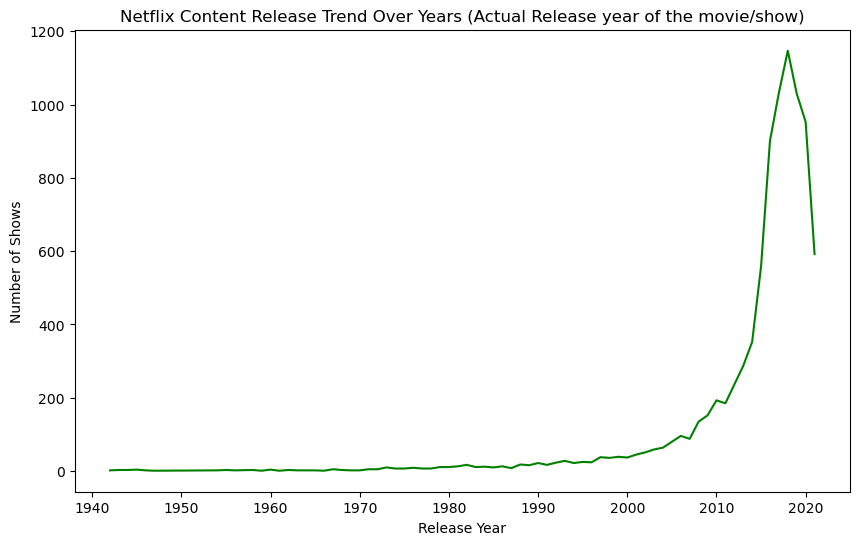

In [48]:
# Grouping by release year to analyze temporal trends
temporal_trends = netflix_df['release_year'].value_counts().sort_index()

# Visualizing content release over the years
temporal_trends.plot(kind='line', figsize=(10, 6), color='green')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.title('Netflix Content Release Trend Over Years (Actual Release year of the movie/show)')
plt.show()



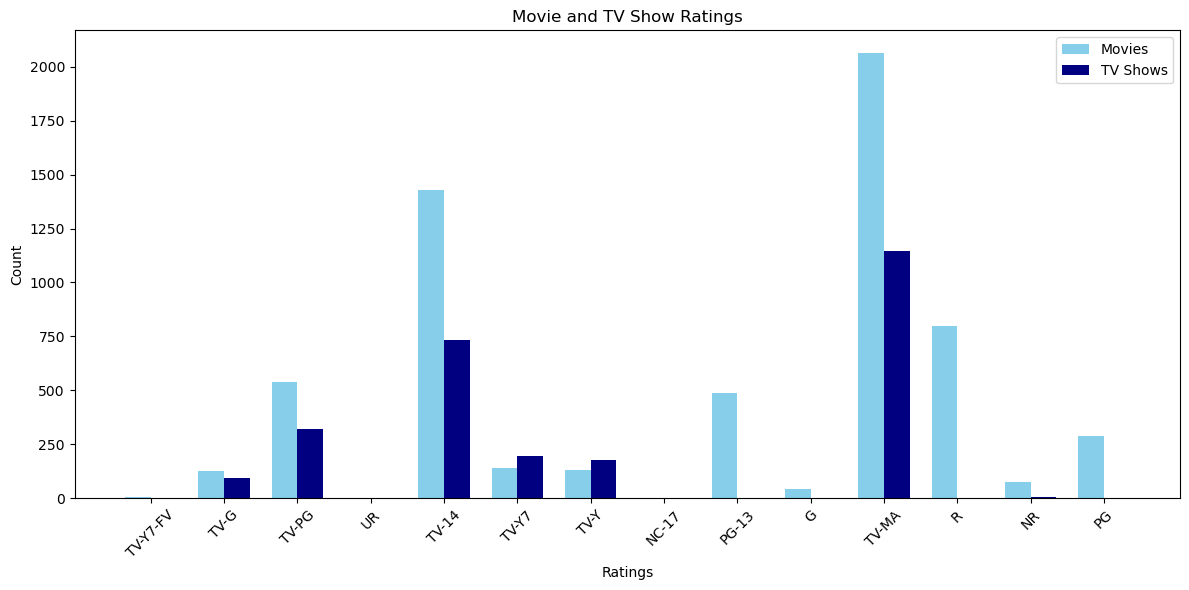

In [50]:

# Counting ratings for movies and TV shows, filling missing values with zeros
movie_ratings_count = movie["rating"].value_counts().sort_index()
tv_ratings_count = tv["rating"].value_counts().sort_index()

# Reindexing to ensure both series have the same labels
all_ratings = list(set(movie_ratings_count.index) | set(tv_ratings_count.index))
movie_ratings_count = movie_ratings_count.reindex(all_ratings).fillna(0)
tv_ratings_count = tv_ratings_count.reindex(all_ratings).fillna(0)

# Creating a grouped bar plot for movie and TV show ratings
plt.figure(figsize=(12, 6))

bar_width = 0.35
index = range(len(all_ratings))

plt.bar(index, movie_ratings_count.values, width=bar_width, color='skyblue', label='Movies')
plt.bar([i + bar_width for i in index], tv_ratings_count.values, width=bar_width, color='navy', label='TV Shows')

plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Movie and TV Show Ratings')
plt.xticks([i + bar_width / 2 for i in index], all_ratings, rotation=45)  # Set x-axis labels

plt.legend()
plt.tight_layout()
plt.show()



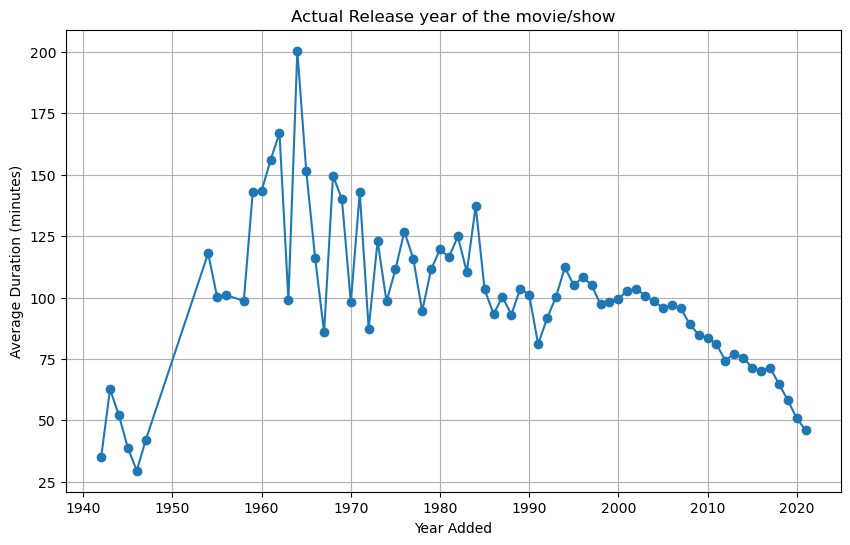

In [54]:
#a time series plot showing how the average duration of content added to Netflix has changed over the years.
# Calculate the average duration for each year_added
average_duration_yearly = netflix_df.groupby('release_year')['duration'].mean().dropna()

# Plotting the average duration per year_added
plt.figure(figsize=(10, 6))
average_duration_yearly.plot(marker='o', linestyle='-')
plt.xlabel('Year Added')
plt.ylabel('Average Duration (minutes)')
plt.title('Actual Release year of the movie/show')
plt.grid(True)
plt.show()
